In [180]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
# Load the Dataset
data = pd.read_csv('email.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [182]:
# Data Preprocessing

# Convert 'ham' to 0 and 'spam' to 1 in the 'Category' column
data['Category'] = data['Category'].str.lower().map({'ham':0, 'spam':1})

# Drop any rows where Category conversion failed (e.g., was NaN)
data = data.dropna(subset=['Category']) 

# Convert Category column to integer type
data['Category'] = data['Category'].astype(int) 

In [183]:
# Separate features and labels
X = data['Message']
y = data['Category']

In [184]:
# Convert text data to numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

In [185]:
# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_vec,y, test_size=0.2, random_state=42, shuffle=True)

In [186]:
# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [187]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [188]:
# Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Precision: {precision_score(y_test,y_pred)}")
print(f"Recall: {recall_score(y_test,y_pred)}")
print(f"F1: {f1_score(y_test,y_pred)}")

Accuracy Score: 0.9623318385650225
Precision: 1.0
Recall: 0.7181208053691275
F1: 0.8359375


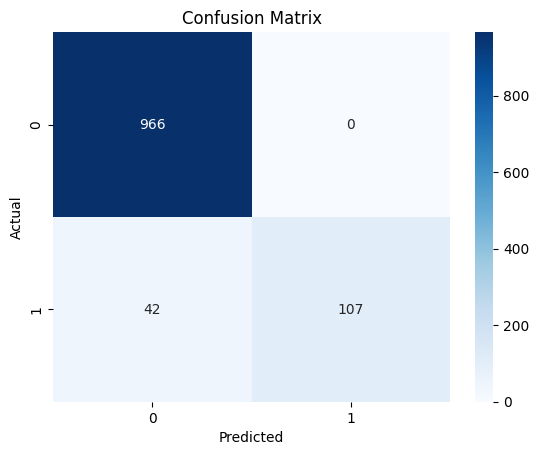

In [189]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [193]:
# -------------------------
# ✅ Real-Time User Input Prediction
# -------------------------

print("\n📧 Type your email content below (type 'quit' to exit):")

while True:
    # Take input from user
    user_input = input("\nYour Email: ")

    # Exit condition
    if user_input.lower() == 'quit':
        break

    # Transform user input using the trained TF-IDF vectorizer
    input_vector = vectorizer.transform([user_input])

    # Predict the label (0 = ham, 1 = spam)
    prediction = model.predict(input_vector)[0]

    # Display the result
    label = 'SPAM' if prediction == 1 else 'HAM (Not Spam)'
    print("🧠 Prediction:", label)


📧 Type your email content below (type 'quit' to exit):
🧠 Prediction: HAM (Not Spam)
🧠 Prediction: HAM (Not Spam)
